In [ ]:
# 1.1 Expected Reward

In [392]:
x1 = float(1+3)/2.0
x2 = float(8-3)/2.0
x3 = float(5+2)/2.0 
x4 = float(6-2)/2.0
x5 = float(4-3)/2.0
x6 = float(2-2)/2.0

expected_reward = ( 1+3+8-3+5+2+6-2+4+3+2-2) /12.0
print('Expectated reward =',expected_reward)

Expectated reward = 2.25


In [393]:
# 1.2 Sample average reward for 10 actions

In [394]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

def cumulative_mean(values):
    return np.cumsum(values) / np.arange(1, len(values) + 1)

from scipy.signal import convolve
def moving_average_over100_rows(values):
    return convolve(values, np.ones(100) / 100., mode="same")

def sample_reward(action):
    if action == 0:
        return np.random.uniform(1, 3)
    elif action == 1:
        return np.random.uniform(-3, 8)
    elif action == 2:
        return np.random.uniform(2, 5)
    elif action == 3:
        return np.random.uniform(-2, 6)
    elif action == 4:
        return np.random.uniform(3, 4)
    else:
        return np.random.uniform(-2, 2)
    
    
def sample_reward2(action):
    if action == 0:
        return np.random.uniform(1, 3)
    elif action == 1:
        return np.random.uniform(-3, 8)
    elif action == 2:
        return np.random.uniform(2, 5)
    elif action == 3:
        return np.random.uniform(5, 7)
    elif action == 4:
        return np.random.uniform(3, 4)
    else:
        return np.random.uniform(-2, 2)


In [395]:
rewards = []
for i in range(10):
    action = np.random.randint(6)
    reward = sample_reward(action)
    rewards.append(reward)

print(expected_reward)
np.mean(rewards)

2.25


2.3007049661689694

2.3007049661689694


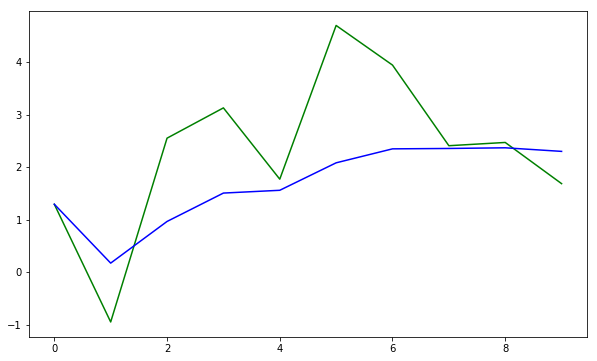

In [396]:
plt.figure(figsize=(10, 6))
plt.plot(rewards, color='green')
plt.plot(cumulative_mean(rewards), color='blue')
print(np.mean(rewards))


Average sample reward for 1000 sample spaces ::  2.2209328576272114


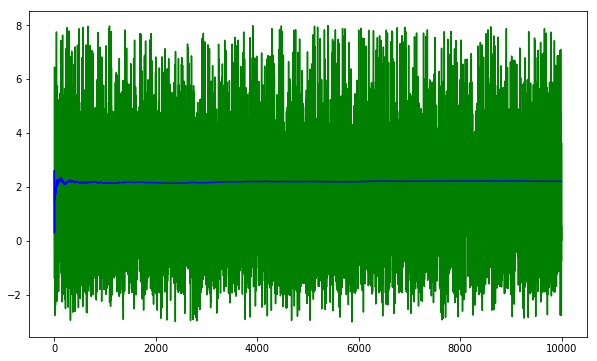

In [397]:
# The expected reward ( when actıons are chosen unıformly ) ıs 2.25 .  If we compute the sample average reward for 10 
# unıformly chosen actıons we get a reward around that value. The more we ıncrease our sample space , we get a reward value 
# convergıng to 2.25. We show ıt wıth 10000 sample spaces below ınstead of 10. 
rewards = []
for i in range(10000):
    action = np.random.randint(6)
    reward = sample_reward(action)
    rewards.append(reward)
    
rewards1 = np.mean(rewards)

print("Average sample reward for 1000 sample spaces :: ",rewards1)
plt.figure(figsize=(10, 6))
plt.plot(rewards, color='green')

plt.plot(cumulative_mean(rewards), color='blue')


In [398]:
# 1.3 epsılon greedy method

In [399]:
epsilon = 0.1
k = 6
Q = np.zeros(k)
N = np.zeros(k)
R , A = [], []
Actions = np.empty((4000, k))
for steps in range(4000):
    if np.random.uniform() < epsilon:
        a = np.random.randint(k)
    else:
        a = np.argmax(Q)
    
    r = sample_reward(a)
    N[a] += 1
    Q[a] = Q[a] + (1.0 / (N[a])) * (r - Q[a])
    Actions[steps, :] = Q
    R.append(r)
    A.append(a)

    

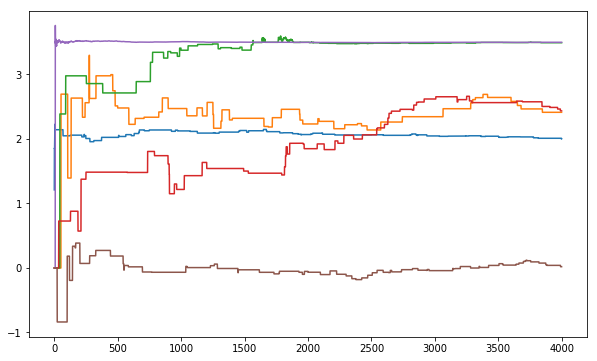

In [400]:
plt.figure(figsize=(10, 6))
plt.plot(Actions[:, 0])
plt.plot(Actions[:, 1])
plt.plot(Actions[:, 2])
plt.plot(Actions[:, 3])
plt.plot(Actions[:, 4])
plt.plot(Actions[:, 5])



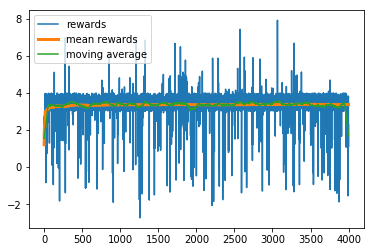

In [401]:
plt.plot(R, label='rewards')
plt.plot(cumulative_mean(R), linewidth=3, label='mean rewards')
from scipy.signal import convolve
plt.plot(moving_average_over100_rows(R), label='moving average')
plt.legend()

In [402]:
#1.4 Redo expeıment wıth constant learnıng rate

In [403]:
epsilon = 0.1
k = 6
Q = np.zeros(k)
alpha = 0.01
R , A = [], []
Actions = np.empty((4000, k))
for steps in range(4000):
    if np.random.uniform() < epsilon:
        a = np.random.randint(k)
    else:
        a = np.argmax(Q)
    if steps > 2000:
        r = sample_reward2(a)
    else:
        r = sample_reward(a)
    Q[a] = Q[a] + alpha* (r - Q[a])
    Actions[steps, :] = Q
    R.append(r)
    A.append(a)


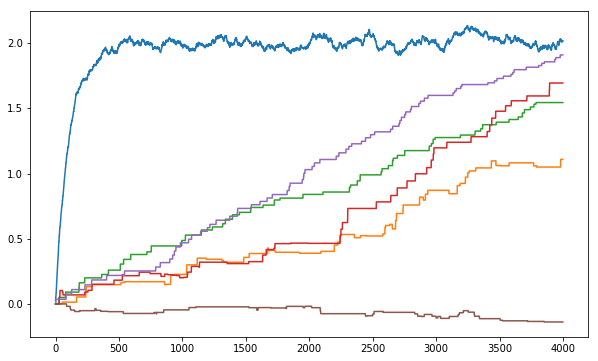

In [404]:
plt.figure(figsize=(10, 6))
plt.plot(Actions[:, 0])
plt.plot(Actions[:, 1])
plt.plot(Actions[:, 2])
plt.plot(Actions[:, 3])
plt.plot(Actions[:, 4])
plt.plot(Actions[:, 5])


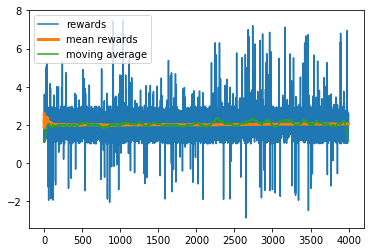

In [405]:
plt.plot(R, label='rewards')
plt.plot(cumulative_mean(R), linewidth=3, label='mean rewards')
from scipy.signal import convolve
plt.plot(moving_average_over100_rows(R), label='moving average')
plt.legend()

In [406]:
#1.5 Greedy actıon

In [407]:
epsilon = 0.1
k = 6
Q = np.ones(k)*5
alpha = 0.01
R , A = [], []
Actions = np.empty((4000, k))
for steps in range(4000):
    a = np.argmax(Q)
    r = sample_reward(a)
    Q[a] = Q[a] + alpha* (r - Q[a])
    Actions[steps, :] = Q
    R.append(r)
    A.append(a)


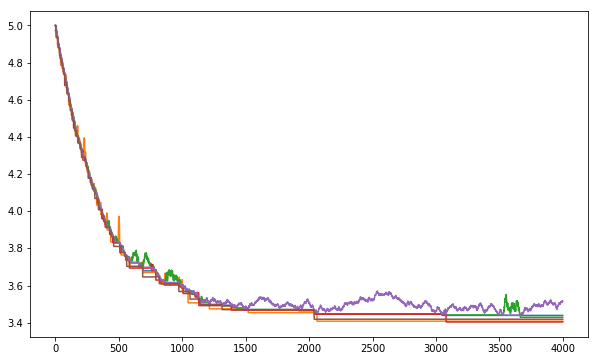

In [408]:
plt.figure(figsize=(10, 6))
plt.plot(Actions[:, 0])
plt.plot(Actions[:, 1])
plt.plot(Actions[:, 2])
plt.plot(Actions[:, 3])
plt.plot(Actions[:, 4])
plt.plot(Actions[:, 5])


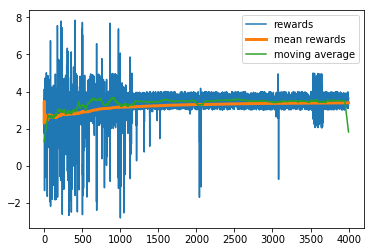

In [409]:
plt.plot(R, label='rewards')
plt.plot(cumulative_mean(R), linewidth=3, label='mean rewards')
from scipy.signal import convolve
plt.plot(moving_average_over100_rows(R), label='moving average')
plt.legend()